In [2]:
from sklearn.datasets import make_regression 
import matplotlib.pyplot as plt
import numpy as np

In [31]:
x,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20)

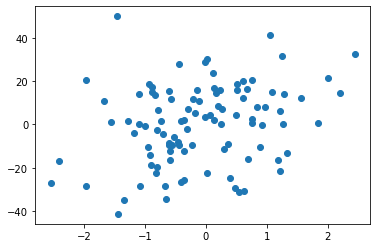

In [32]:
plt.scatter(x,y)

In [33]:
from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [34]:
from sklearn.linear_model import LinearRegression 

lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [35]:
print(lr.coef_)
print(lr.intercept_)

[4.61876261]
1.2445583935577254


In [36]:
np.mean(cross_val_score(lr,x,y,scoring='r2',cv=10))

-0.064826519781879

In [37]:
from sklearn.metrics import r2_score
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.07503456771368622

In [38]:
class GDRegressor:
    def __init__ (self,learning_rate,epochs):
        self.m=1
        self.b=0
        self.lr=learning_rate
        self.epochs =epochs 
        
    def fit(self,x,y):
            for i in range(self.epochs):
                loss_slope_b = -2* np.sum(y-(self.m*x.ravel())-self.b);
                loss_slope_m=-2*np.sum((y-(self.m*x.ravel())-self.m)*x.ravel())
                self.b = self.b-(self.lr*loss_slope_b)
                self.m = self.m-(self.lr*loss_slope_m)
#                 print(self.b,self.m)
            print(self.b,self.m)    
    
    def predict(self,x):
        return self.m*x + self.b

In [39]:
lnr=0.01
epochs = 100
gd = GDRegressor(lnr,epochs)

gd.fit(x_train,y_train)

1.251169830886911 4.773229070858646


In [40]:
gd.predict(x_test)
from sklearn.metrics import r2_score
y_pred = gd.predict(x_test)
r2_score(y_test,y_pred)

0.07711513757243671